# PythonistR: A Match Made in Data Heaven

![](https://github.com/cosimameyer/r-python-talk/blob/main/img/cover.png?raw=true)

The workshop is delievered as part of [Women in Data Science 2023](https://wuman.de/wids/).

To access additional material of the workshop, please check the [GitHub repository](https://github.com/cosimameyer/r-python-talk).

**Agenda:**

1. Introducing a data science workflow
2. Data acessing
3. Data wrangling
4. Data visualization

Throughout the notebook, we will mix the use of R and Python. Often it is a matter of taste when you use which - for some instances one language might be better thant the other. We follow this workflow:

![](https://github.com/cosimameyer/r-python-talk/blob/main/img/data_science_flow.png?raw=true)

Where the snake appears, we will be using *Python*, the letter R stands for examples where we use *R*.



---


### Logistics 👷‍♀️

Before we get started, we need to make sure that all required libraries are installed.

The standard package indices in Python is called [PyPi](https://cran.r-project.org) and in R it is [CRAN](https://pypi.org).

#### Python 🐍

In [1]:
%%capture
!pip install sweetviz
!pip install pandas
!pip install rpy2==3.5.1
!pip install countrycode
!pip install plotnine
!pip install patchworklib

Once installed, we load the packages in Python:

In [2]:
import pandas as pd
import sweetviz as sv
from pandas_profiling import ProfileReport
from countrycode import countrycode
from plotnine import *
import patchworklib as pw

<Figure size 72x72 with 0 Axes>

#### R 🔵


There are different ways how to use R and Python in one project. We are using [`rpy2`](https://pypi.org) here that allows us to call code chunks in R in Jupyter notebooks. Alternatively, you can also turn to [Quarto](https://quarto.org) that you can run in your local IDEs (for instance in RStudio Desktop or VS Code). Quarto is great - I also used it to generate the slides that you see throughout the workshop. 

In [3]:
%load_ext rpy2.ipython

In a next step, we repeat the same step and install the packages for R. Similar as in Python, some packages are pre-installed and we don't need to install them here.

In [4]:
%%R
install.packages("countrycode")
install.packages("skimr")
install.packages("patchwork")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpKFMRPF/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpKFMRPF/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpKFMRPF/downloaded_packages’



Similar as in Python, we now also load the packages:

In [5]:
%%R
# Package for data wrangling
library(dplyr)
# Package for exploratory data analysis
library(skimr)
# Package for converting country codes (and also identify continents)
library(countrycode)
# Package for visualization
library(ggplot2)
# Package that allows to arrange multiple plots the way you want
library(patchwork)

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union


https://r-graphics.org




---


### Question 🙋‍♀️

At the very beginning of every data science task usually stands a question. The question may be revised and adjusted throughout the process. To showcase the data science process, we will follow the following question:

**Are there differences across European countries when it comes to requesting mental health treatment?**

### Data access 📖  <img src='https://github.com/cosimameyer/r-python-talk/blob/main/img/access.png?raw=true' align="right" height="139" />

To study the question, we work with data from a Mental Health Survey in Tech, provided by [Kaggle](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey). Before we dive into the data, we will first load it. There are also ways to directly access a Kaggle dataset in Google Colab using access tokens but we will go another way and load it as if it was on our local machines. This helps us also to understand how we were to load data from our local machines.

#### Python 🐍

We store the URL of the data in an object called `url`. In a next step, we use `pandas` [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function to open the data and store it in `df_python`.

In [6]:
url = "https://raw.githubusercontent.com/cosimameyer/r-python-talk/main/data/survey.csv"

df_python = pd.read_csv(url)

#### R 🔵

We can also use R to load the data. Here, multiple options are possible. We will be using `read.csv` from base R. If you prefer the [tidyverse](), you can also use [`readr::read_csv`](https://readr.tidyverse.org/reference/read_delim.html). We store the data frame in `df_r`.

In [7]:
%%R

# The cell magic `%%R` is necessary in Jupyter notebooks to call R
# code chunks

url = "https://raw.githubusercontent.com/cosimameyer/r-python-talk/main/data/survey.csv"

df_r <- read.csv(url)



---



### Data wrangling 🛠️ <img src='https://github.com/cosimameyer/r-python-talk/blob/main/img/wrangling.png?raw=true' align="right" height="139" />

Now that we loaded our data, we can look at it. This step is also called **e**xploratory **d**ata **a**nalysis (or EDA). It is an essential step that won't only happen at the beginning of every data analysis but you will often come back to it throughout the data science process. 

If you click on the [Kaggle link](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey), you will learn more about the data themselves including a list of all variables and a data explorer. This gives you already a first overview of the data. 

#### Python 🐍

Using `shape`, we access the dimensions of the data frame. This gives us a good understanding of the number of rows (1,259) and columns (27).

In [8]:
df_python.shape

(1259, 27)

In your own notebook, a next step would be to "print" the head of the data - that means to look at the first lines of the data frame:

In [9]:
df_python.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In a next step, we use `df_python.info()` to get a general overview of the dataset:

In [10]:
df_python.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

This tells us a lot about the data. We see the column names (= our features/variables), whether there are NAs (`Non-Null Count`) and we also learn more about the data type (`Dtype`).


To get an even better idea of the data (with more information and also some visualizations), we use a small (but powerful) package inside the notebook. It's called `sweetviz` and helps to generate nice EDA reports with just two lines of code! 

We see a general overview of the dataframe in the top (including rows, duplicates, the number of variables (= features), the distribution of the variable types (categorical, numerical, and text), and the size of the dataset). If you then scroll down, you will see a visual representation of each variable including the distribution, the number of distinct values as well as missings. If you click on a single tab, it will expand and give you even more information.

This is an excellent starting point for every data analysis. 

                                             |          | [  0%]   00:00 -> (? left)


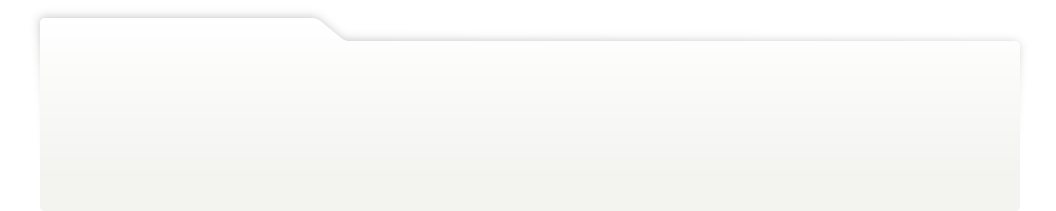
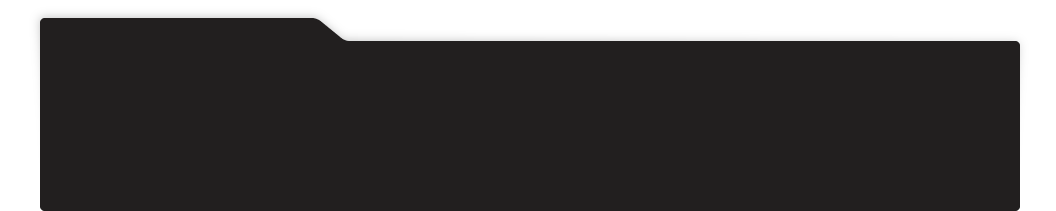
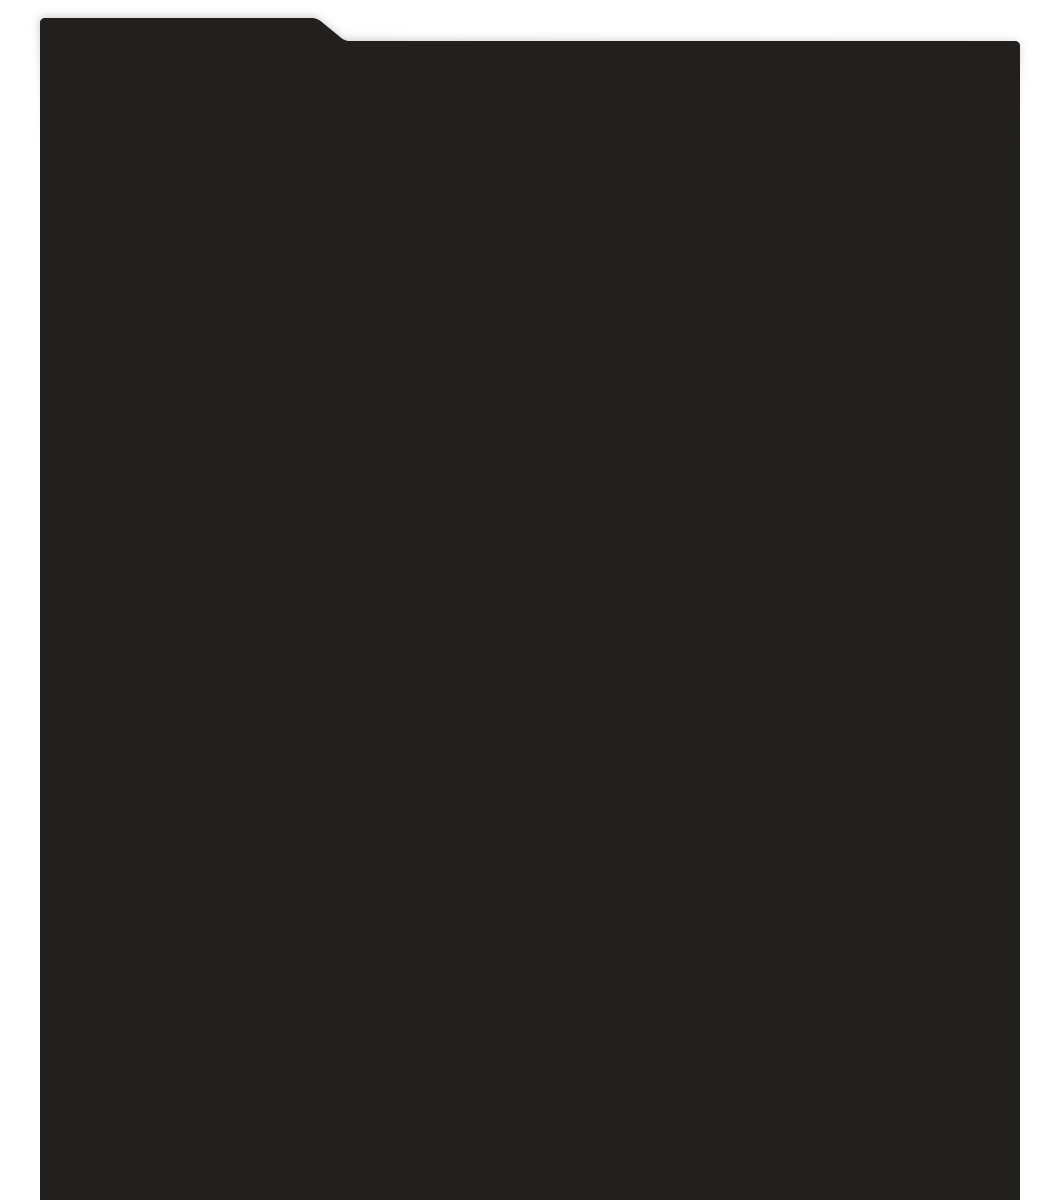
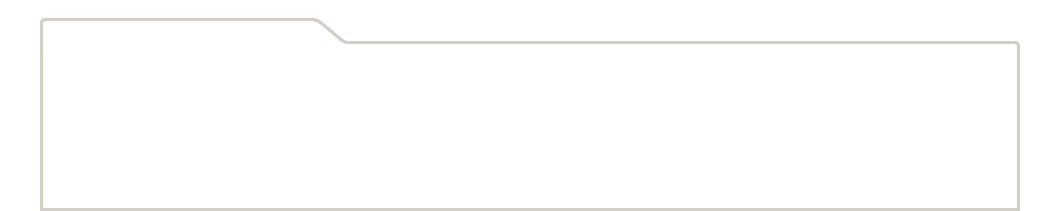
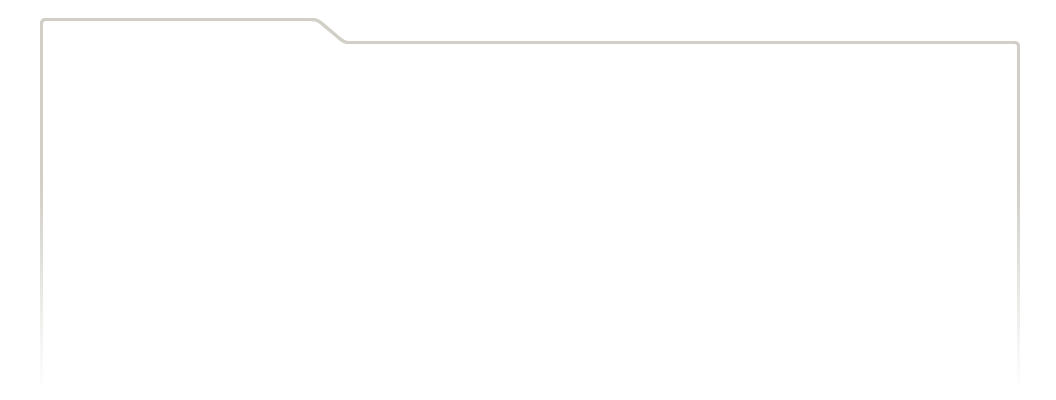
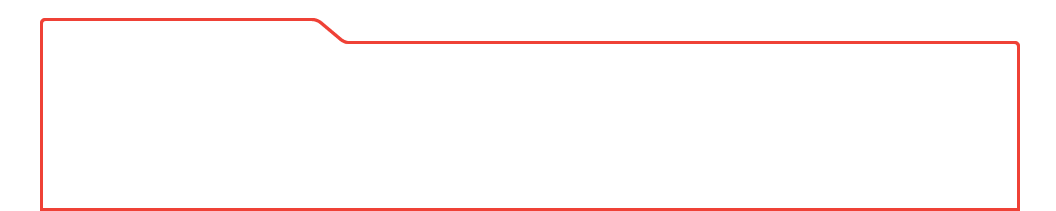
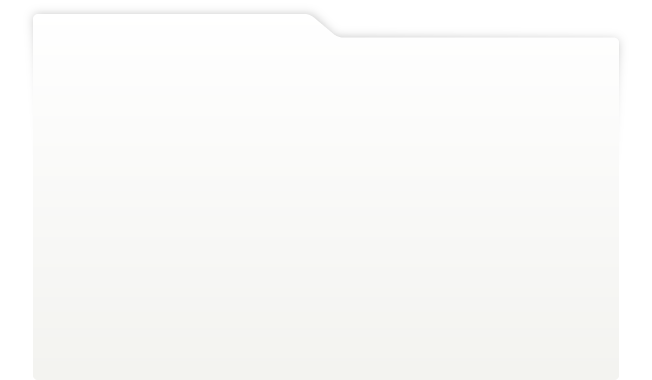
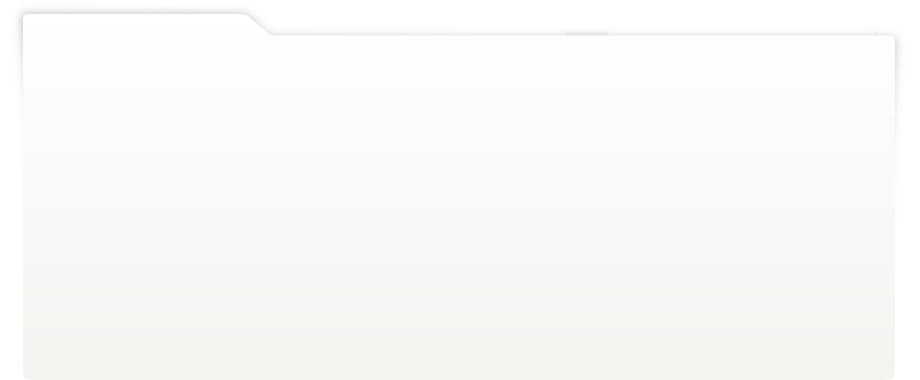
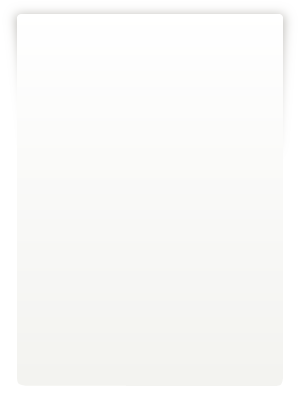
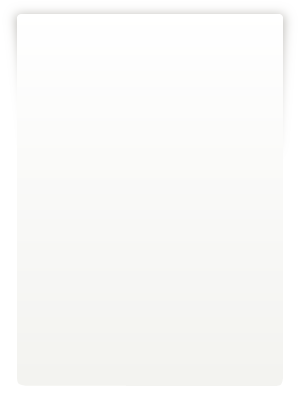
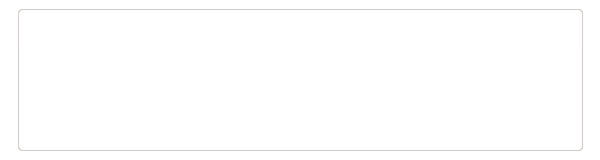
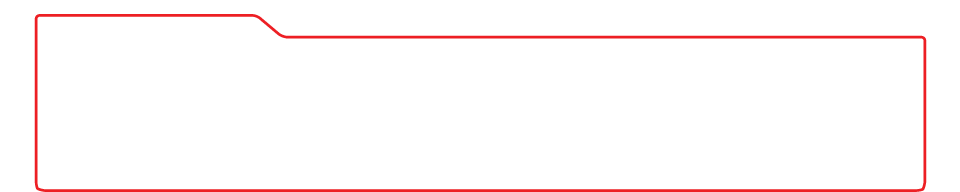
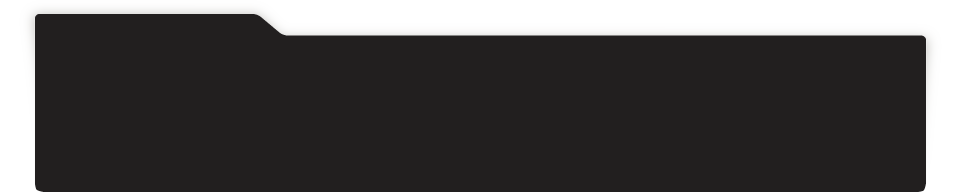
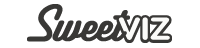
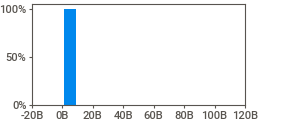
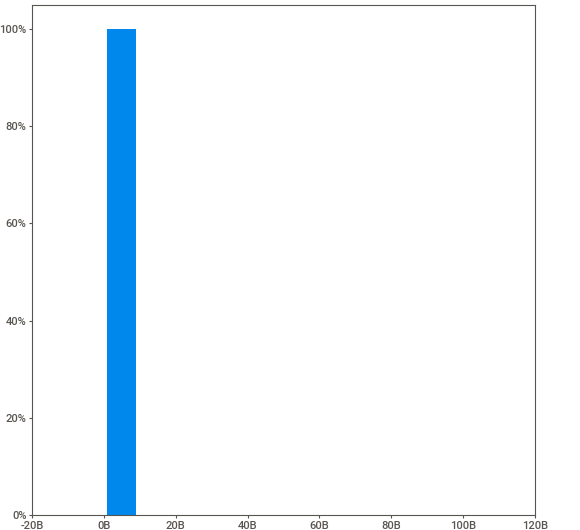
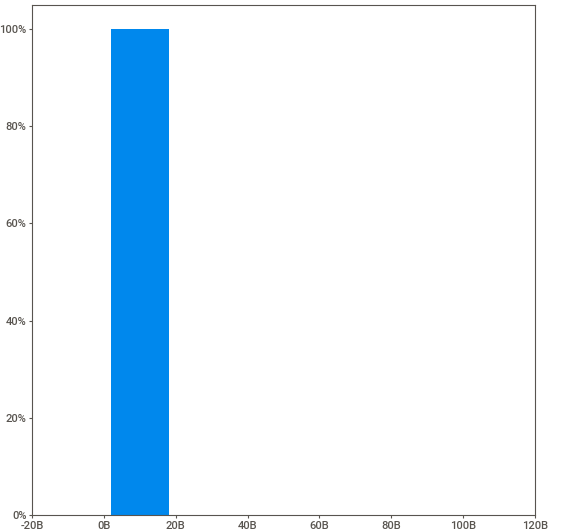
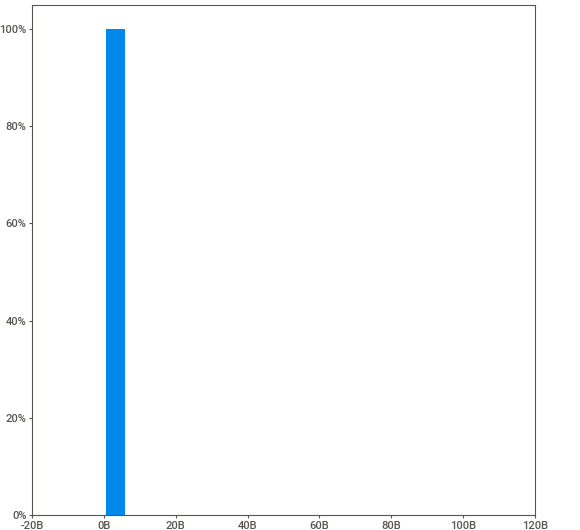
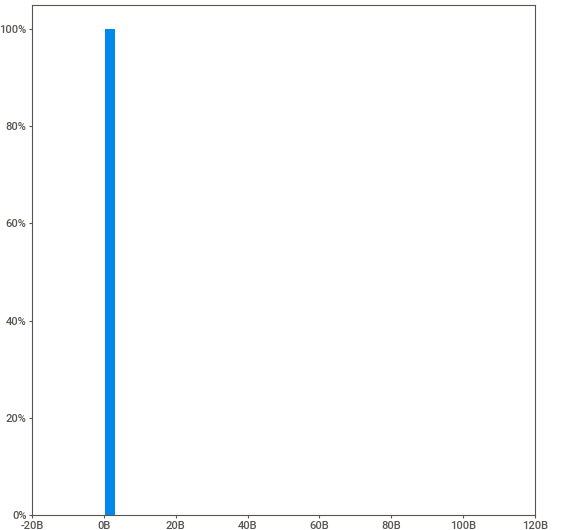
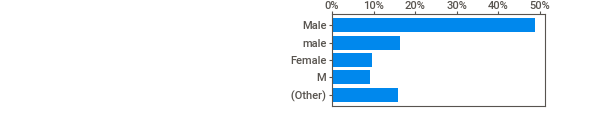
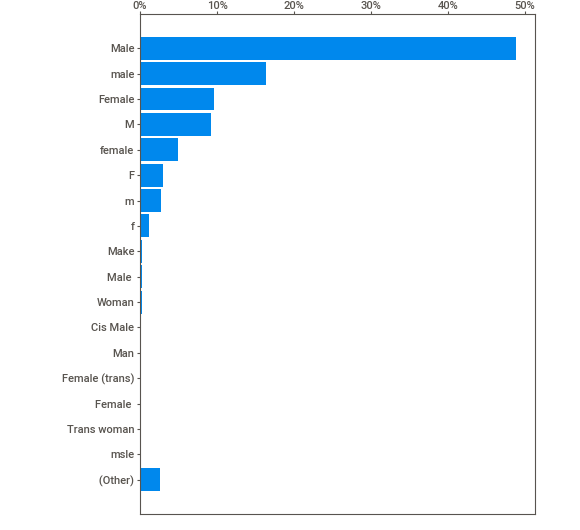
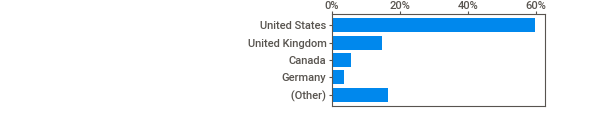
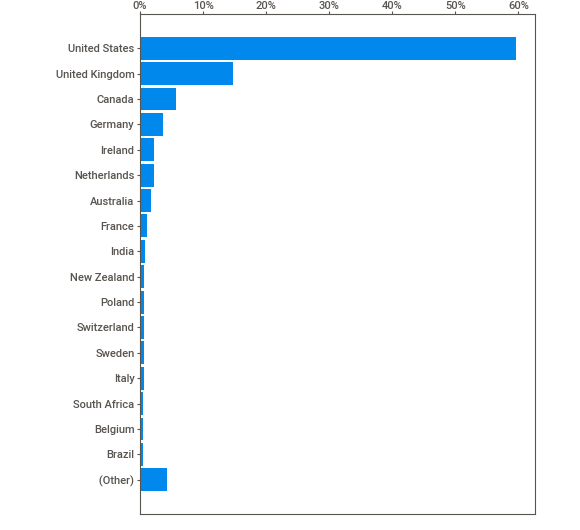
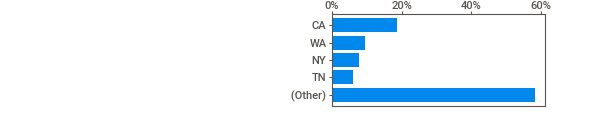
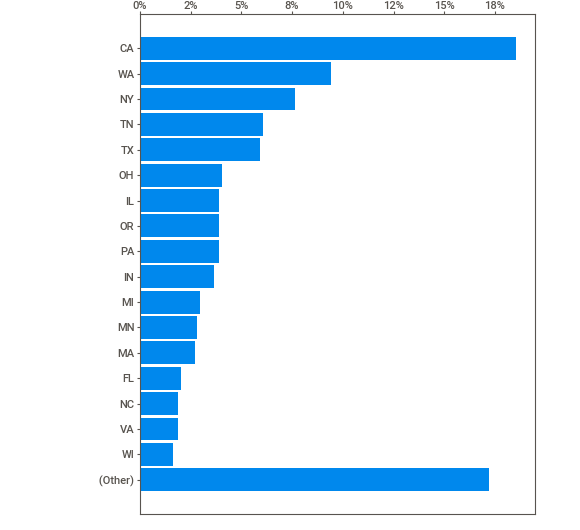
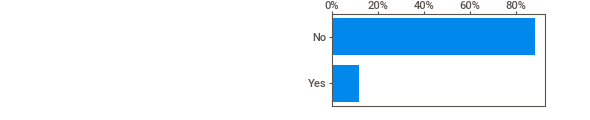
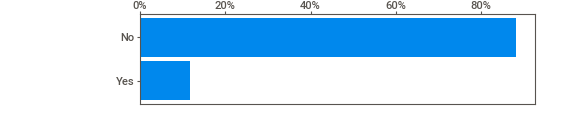
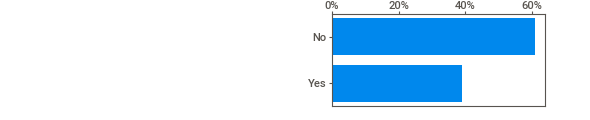
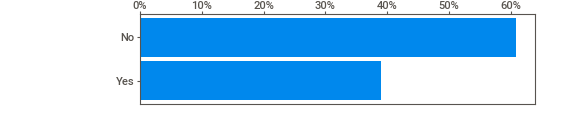
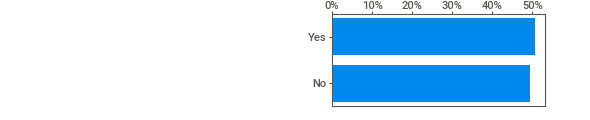
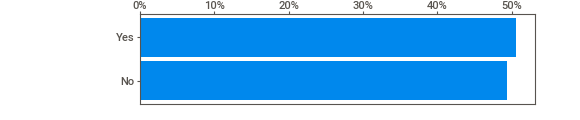
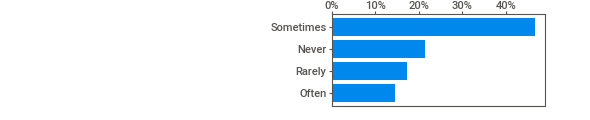
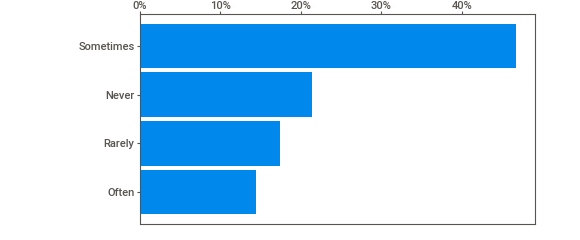
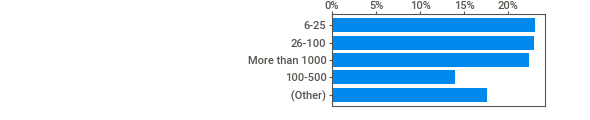
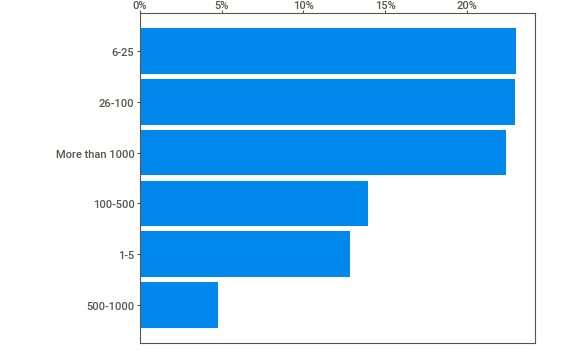
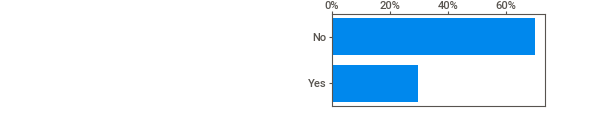
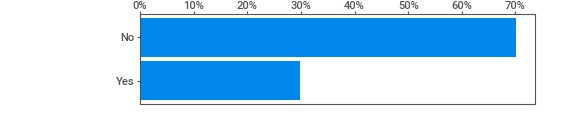
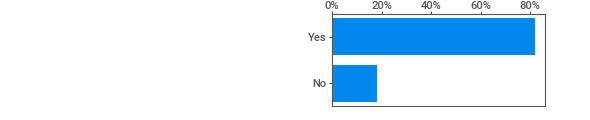
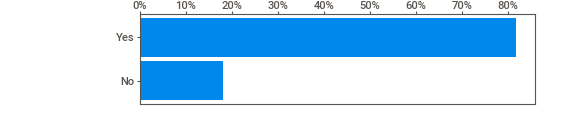
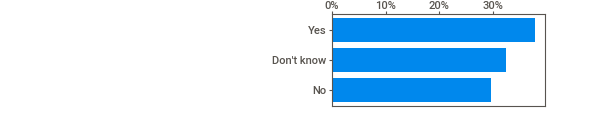
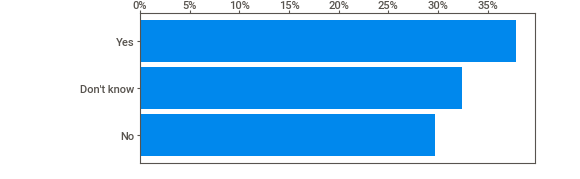
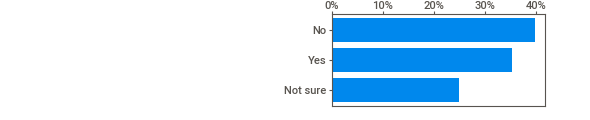
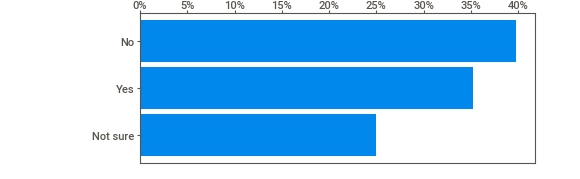
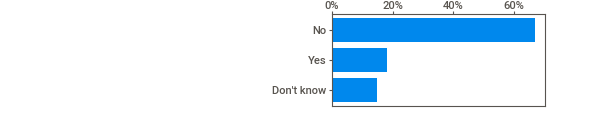
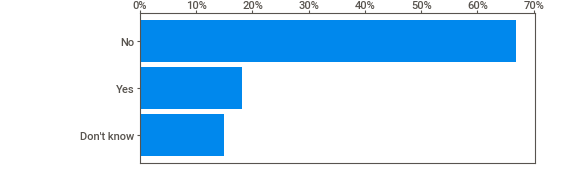
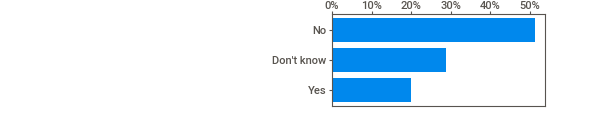
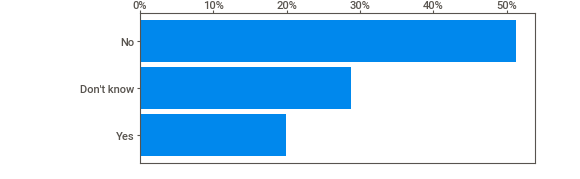
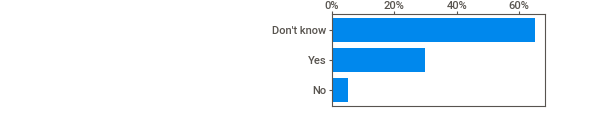
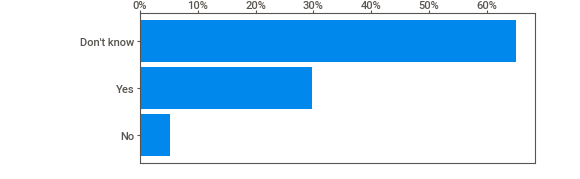
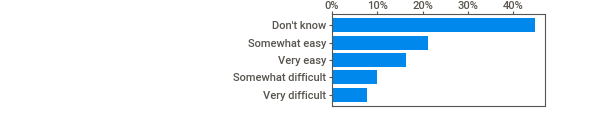
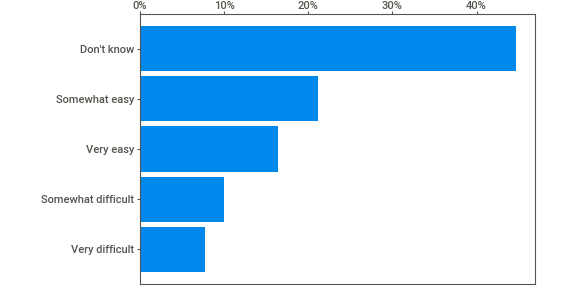
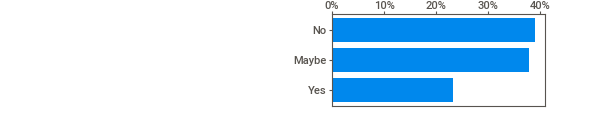
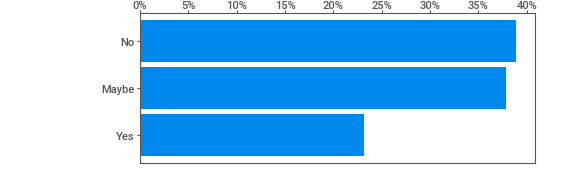
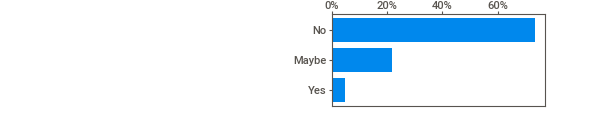
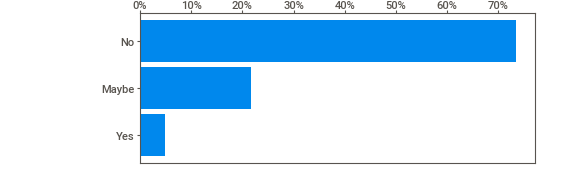
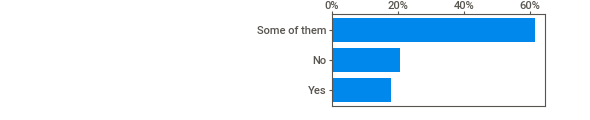
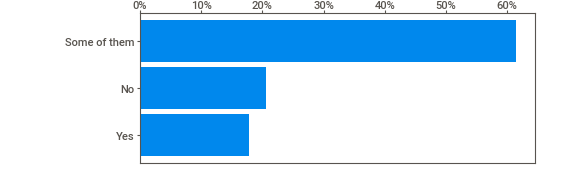
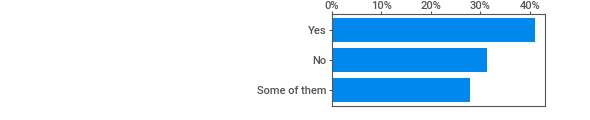
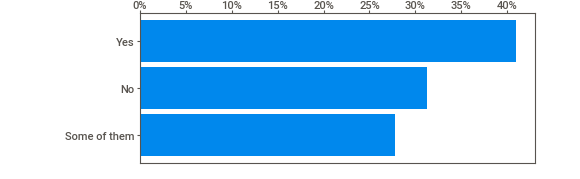
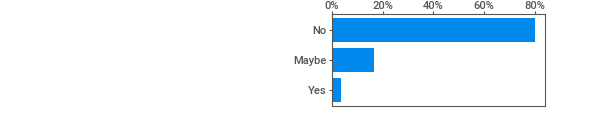
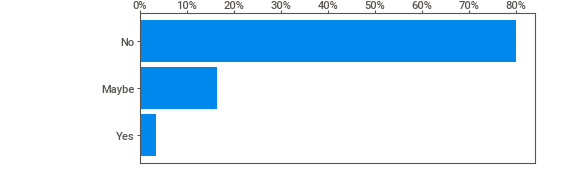
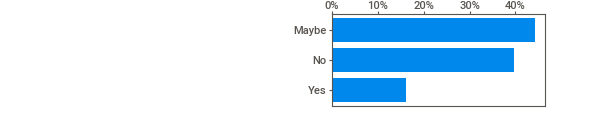
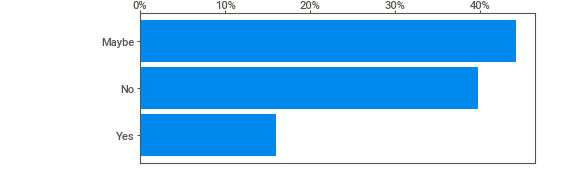
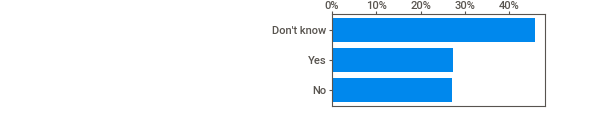
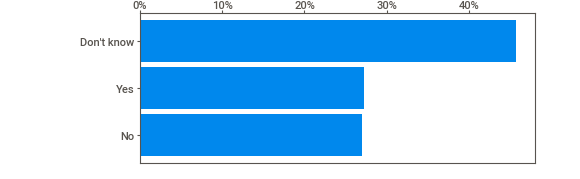
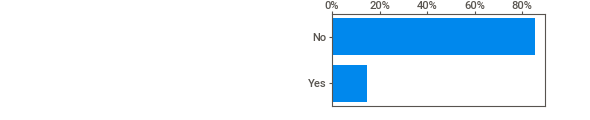
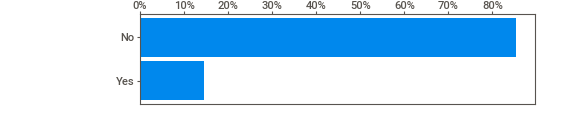
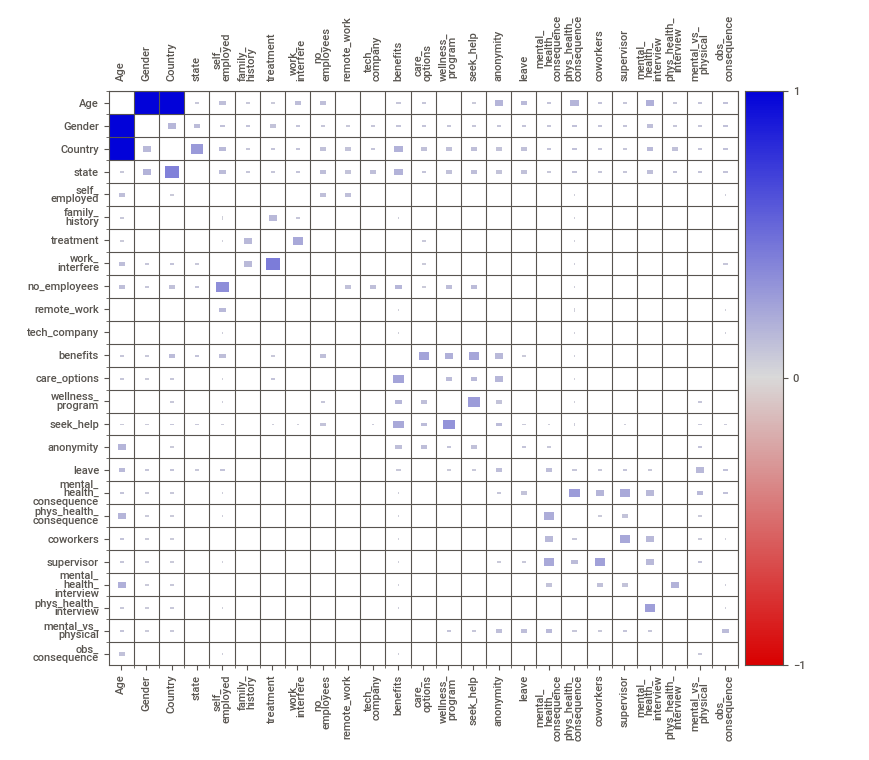
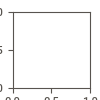

In [11]:
report = sv.analyze(df_python)
report.show_notebook(layout="vertical", w=800, h=700, scale=0.8)

There are more libraries like this. If you are curious, you can also try [`autoviz`](https://github.com/AutoViML/AutoViz), [`pandas-profiling`](https://github.com/pandas-profiling/pandas-profiling/) or [`dtale`](https://github.com/man-group/dtale).

Once we have an idea of the data, we continue and subset the data frame to the variables that we need - in our case `Country` and `treatment`. Looking at the [Kaggle codebook](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey), we learn that:
- `Country` stands for the country where the respondent lives in
- `treatment` provides the answer to the question "Have you sought treatment for a mental health condition?"

To wrangle the data, we again rely on [`pandas`](https://pandas.pydata.org) - a go-to library that makes working with data easy.

In [12]:
df_python_small = df_python[['Country', 'treatment']]

# We then again print the head to understand the changes in our data frame
df_python_small.head()                

,Country,treatment
0,United States,Yes
1,United States,No
2,Canada,No
3,United Kingdom,Yes
4,United States,No


We see that only the column `Country` and the column `treatment` remain. Since we are only interested in countries in Europe, we need to identify a way to select these countries. It would be possible to generate a list with countries in Europe ourselves - but that would take up much of our time. Luckily other people thought the same and developed a tool that does the work for us. The library [`countrycode`](https://pypi.org/project/countrycode/) is a wrapper for the R library. While the syntax is slightly different, the logic remains the same:

In [13]:
# Get the region
df_python_small['region'] = countrycode.countrycode(codes=df_python_small['Country'], 
                                                      origin='country_name', 
                                                      target='region')
# Get an ISO3 country code
df_python_small['country'] = countrycode.countrycode(codes=df_python_small['Country'], 
                                                       origin='country_name', 
                                                       target='iso3c')
# Print the head again
df_python_small.head()

,Country,treatment,region,country
0,United States,Yes,Northern America,USA
1,United States,No,Northern America,USA
2,Canada,No,Northern America,CAN
3,United Kingdom,Yes,Northern Europe,GBR
4,United States,No,Northern America,USA


In a next step, we subset the data and only keep those countries that are located within Europe.

In [14]:
# For this, we define the range of the regions
region_value = ["Northern Europe", "Western Europe", 
                              "Eastern Europe", "Southern Europe"]

# Use the information from `region_value` and keep only those countries where 
# the region is in `region_value`
df_python_small2 = df_python_small[df_python_small['region'].isin(region_value)]

# Last but not least, we again print the head:
df_python_small2.head()             

,Country,treatment,region,country
3,United Kingdom,Yes,Northern Europe,GBR
11,Bulgaria,No,Eastern Europe,BGR
16,United Kingdom,Yes,Northern Europe,GBR
19,France,No,Western Europe,FRA
29,United Kingdom,No,Northern Europe,GBR


In a last step, we count the number of treatment occurences ("Yes" vs "No") by `country` and store the result in `df_python_clean`.

In [15]:
# Count the distinct treatment answer by country
df_python_clean = df_python_small2.value_counts(['country', 'treatment']). \
                    reset_index(name='n')

# Print the head
df_python_clean.head()

,country,treatment,n
0,GBR,Yes,93
1,GBR,No,92
2,DEU,No,24
3,DEU,Yes,21
4,NLD,No,18


In a next step, we calculate the sum of `n` (this is the count that we generated above) by country. We will use this information later to calculate the shared percentage.

In [16]:
# Calculate the total answers by country (irrespective of the distinct answer)
df_python_clean2 = df_python_clean.groupby(['country']).n. \
                    agg('sum').reset_index(name='total')

# Print the head
df_python_clean2.head()

,country,total
0,AUT,3
1,BEL,6
2,BGR,4
3,BIH,1
4,CHE,7


We have two data frames now (`df_python_clean2` and `df_python_clean3`). To bring them back together, we use a `merge`.

In [17]:
# Merge df_python_clean2 and df_python_clean3
df_python_cleaned = df_python_clean2.merge(df_python_clean, on='country')

# Print the head
df_python_cleaned.head()

,country,total,treatment,n
0,AUT,3,No,3
1,BEL,6,No,5
2,BEL,6,Yes,1
3,BGR,4,No,2
4,BGR,4,Yes,2


In a last step, we then calculate the percentage share.

In [18]:
# Calculate the percentage share
df_python_cleaned['percent'] = round((df_python_cleaned['n']/df_python_cleaned['total'])*100, 2)

# Print the head
df_python_cleaned.head()

,country,total,treatment,n,percent
0,AUT,3,No,3,100.00
1,BEL,6,No,5,83.33
2,BEL,6,Yes,1,16.67
3,BGR,4,No,2,50.00
4,BGR,4,Yes,2,50.00


While we executed single steps here, we can also introduce chains and execute them in one longer step:

In [19]:
# Define regions
region_value = ["Northern Europe", "Western Europe", 
                              "Eastern Europe", "Southern Europe"]

# Execute the chain
df_clean1 = (df_python[['Country', 'treatment']]
              .assign(region=lambda d: countrycode.countrycode(codes=d['Country'], 
                                                      origin='country_name', 
                                                      target='region'))
              .assign(country=lambda d: countrycode.countrycode(codes=d['Country'], 
                                                      origin='country_name', 
                                                      target='iso3c'))
              .loc[lambda x: x['region'].isin(region_value)]
              .value_counts(['country', 'treatment']).reset_index(name='n'))

# Calculate the total answers by country 
# (irrespective of the distinct answer)
df_clean2 = df_clean1.groupby(['country']).n. \
                    agg('sum').reset_index(name='total')

# Merge df_python_clean2 and df_python_clean3
df_python_cleaned = df_clean2.merge(df_clean1, on='country')

# Calculate the percentage share
df_python_cleaned['percent'] = round((df_python_cleaned['n']/df_python_cleaned['total'])*100, 2)

# And again print the head
df_python_cleaned.head()

,country,total,treatment,n,percent
0,AUT,3,No,3,100.00
1,BEL,6,No,5,83.33
2,BEL,6,Yes,1,16.67
3,BGR,4,No,2,50.00
4,BGR,4,Yes,2,50.00


#### R 🔵

We can, of course ☺️, also do these steps in R. There are also similar approaches in the R-universe. To get the number of rows and columns, we call `dim()`:

In [20]:
%%R 

dim(df_r)

[1] 1259   27


To print the head, R has `head()`:

In [21]:
%%R

head(df_r)

            Timestamp Age Gender        Country state self_employed
1 2014-08-27 11:29:31  37 Female  United States    IL          <NA>
2 2014-08-27 11:29:37  44      M  United States    IN          <NA>
3 2014-08-27 11:29:44  32   Male         Canada  <NA>          <NA>
4 2014-08-27 11:29:46  31   Male United Kingdom  <NA>          <NA>
5 2014-08-27 11:30:22  31   Male  United States    TX          <NA>
6 2014-08-27 11:31:22  33   Male  United States    TN          <NA>
  family_history treatment work_interfere   no_employees remote_work
1             No       Yes          Often           6-25          No
2             No        No         Rarely More than 1000          No
3             No        No         Rarely           6-25          No
4            Yes       Yes          Often         26-100          No
5             No        No          Never        100-500         Yes
6            Yes        No      Sometimes           6-25          No
  tech_company   benefits care_options we

`str()` and `summary()` help us to understand the general structure of our data.

In [22]:
%%R
str(df_r)

'data.frame':	1259 obs. of  27 variables:
 $ Timestamp                : chr  "2014-08-27 11:29:31" "2014-08-27 11:29:37" "2014-08-27 11:29:44" "2014-08-27 11:29:46" ...
 $ Age                      : num  37 44 32 31 31 33 35 39 42 23 ...
 $ Gender                   : chr  "Female" "M" "Male" "Male" ...
 $ Country                  : chr  "United States" "United States" "Canada" "United Kingdom" ...
 $ state                    : chr  "IL" "IN" NA NA ...
 $ self_employed            : chr  NA NA NA NA ...
 $ family_history           : chr  "No" "No" "No" "Yes" ...
 $ treatment                : chr  "Yes" "No" "No" "Yes" ...
 $ work_interfere           : chr  "Often" "Rarely" "Rarely" "Often" ...
 $ no_employees             : chr  "6-25" "More than 1000" "6-25" "26-100" ...
 $ remote_work              : chr  "No" "No" "No" "No" ...
 $ tech_company             : chr  "Yes" "No" "Yes" "Yes" ...
 $ benefits                 : chr  "Yes" "Don't know" "No" "No" ...
 $ care_options             : c

In [23]:
%%R
summary(df_r)

  Timestamp              Age                Gender            Country         
 Length:1259        Min.   :-1.726e+03   Length:1259        Length:1259       
 Class :character   1st Qu.: 2.700e+01   Class :character   Class :character  
 Mode  :character   Median : 3.100e+01   Mode  :character   Mode  :character  
                    Mean   : 7.943e+07                                        
                    3rd Qu.: 3.600e+01                                        
                    Max.   : 1.000e+11                                        
    state           self_employed      family_history      treatment        
 Length:1259        Length:1259        Length:1259        Length:1259       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                              

But they don't provide info on the number of missing data. Here, the library [`skimr`](https://cran.r-project.org/web/packages/skimr/vignettes/skimr.html) can help. It provides you with a more detailed output. If you want to know what else is out there for exploratory data analysis in R, have a look at the [recent publication](https://doi.org/10.21105/joss.04740) which compares more packages.

In [24]:
%%R
skimr::skim(df_r) 


── Data Summary ────────────────────────
                           Values
Name                       df_r  
Number of rows             1259  
Number of columns          27    
_______________________          
Column type frequency:           
  character                26    
  numeric                  1     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
   skim_variable             n_missing complete_rate min  max empty n_unique
 1 Timestamp                         0         1      19   19     0     1246
 2 Gender                            0         1       1   46     0       49
 3 Country                           0         1       5   22     0       48
 4 state                           515         0.591   2    2     0       45
 5 self_employed                    18         0.986   2    3     0        2
 6 family_history                    0         1       2    3     0        

In a next step, we perform some data wrangling. The term data wrangling is rather broad and can include various things - depending on the use case and the goal of your wranglin. It can mean that you need to pre-process text data if you work with it or that you need to reshape the data completely to make them fit your purpose. We'll repeat the steps that we have performed in Python in R and create the `df_r_clean` dataset. For this, we first create new country odes using the [`countrycode`](https://cran.r-project.org/web/packages/countrycode/countrycode.pdf) package, then filter for the required regions (based on the World Bank). In a next step, we then select `country` and `treatment`. We group by these variables and generate a count, group again - only by `country` this time. In the last step we then generate the percentage and store it in `percent`.

To do this, the package [`dplyr`](https://dplyr.tidyverse.org) is a gem! It makes data wrangling easy and allows to write easily readable code. You can see an example below. 

R has a special operator - is called a pipe (`%>%`) and come from the package [`magrittr`](https://cran.r-project.org/web/packages/magrittr/vignettes/magrittr.html) that is a dependency of `dplyr`.

In [25]:
%%R

df_r_clean <- df_r %>%
  # Generate the ISO3 country name (`country`) and the region (`region`)
  dplyr::mutate(country = countrycode::countrycode(Country, 'country.name', 'iso3c'),
                region = countrycode::countrycode(Country, 'country.name', 'region23')) %>%
  # We now filter for countries in Europe
  dplyr::filter(region %in% c("Northern Europe", "Western Europe", 
                              "Eastern Europe", "Southern Europe")) %>%
  # Select the required variables
  dplyr::select(country, treatment) %>%
  # Group by them...
  dplyr::group_by(country, treatment) %>%
  # ... and generate the count. This way we count the number of "Yes" and "No" 
  # (which is the answer to the treatment question) by country
  count() %>%
  # Now we group again by country
  dplyr::group_by(country) %>%
  # Calculate the sum of the count (`n`) by country (this will be the total 
  # count by country) and use this information to calculate the percentage
  # share for each category by country
  dplyr::mutate(total = sum(n),
                percent = (n/total)*100)

df_r_clean

# A tibble: 39 × 5
# Groups:   country [27]
   country treatment     n total percent
   <chr>   <chr>     <int> <int>   <dbl>
 1 AUT     No            3     3   100  
 2 BEL     No            5     6    83.3
 3 BEL     Yes           1     6    16.7
 4 BGR     No            2     4    50  
 5 BGR     Yes           2     4    50  
 6 BIH     No            1     1   100  
 7 CHE     No            4     7    57.1
 8 CHE     Yes           3     7    42.9
 9 CZE     No            1     1   100  
10 DEU     No           24    45    53.3
# … with 29 more rows
# ℹ Use `print(n = ...)` to see more rows


Printing the data set again, we see that percentage can be often misleading if we don't know the total share by country. This is an important information that we need to keep in mind when later interpreting the data.



---



### Visualization 👩‍🎨 <img src='https://github.com/cosimameyer/r-python-talk/blob/main/img/visualization.png?raw=true' align="right" height="139" />

As you have already seen, both R and Python are extremely versatile and are both good candidate for the tasks. It often comes down to a matter of personal taste, what your collaborators use, and/or of course a certain path dependency - may it be what you have learned first, what the company/team you are working for and with prefer to use, etc. 

For getting an inspiration for visualizations, my go-to resource is [data-to-viz.com](https://www.data-to-viz.com). It's a comprehensive website with an easily accessible overview that provides code snippets in both R and Python.

#### R 🔵

We will now switch in R. We could either use the generated objects in R above or call the Python data frame inside an R cell. We'll try the latter to show how Jupyter notebook allows us switching between the languages.

In [26]:
%%R -i df_python_cleaned

# Store the python data frame in a new object
df_r_new <- df_python_cleaned

# Print the head
head(df_r_new)

  country total treatment n percent
0     AUT     3        No 3  100.00
1     BEL     6        No 5   83.33
2     BEL     6       Yes 1   16.67
3     BGR     4        No 2   50.00
4     BGR     4       Yes 2   50.00
5     BIH     1        No 1  100.00


When it comes to visulizations, my personal preference is [`ggplot2`](https://ggplot2.tidyverse.org) (from R). The preference may of course differ, depending on who you ask 🤓

To visualize our data, we create a function. This is not required and we can also copy-paste the code as often as we want, **but**: writing functions increases replicability and is good practice 👍 

Copy-pasting your code increases the chance of running into "copy-paste" errors and (believe me) this can be really frustrating to maintain and debug 👎 

While it may seem intimidating at first, it's often not too difficult and a great asset in the long-run!

In [27]:
%%R

generate_plot <- function(df, value, region_value) {

    plot <- df %>%
      # We need to generate the region again (it was lost during the data wrangling process)
      dplyr::mutate(region = countrycode::countrycode(country, 'iso3c', 'region23')) %>%
      # We then filter based on the provided region_value and only keep those where the answer
      # was "Yes". This is important when interpreting the plot later.
      dplyr::filter(region == !! ensym(region_value),
                    !! ensym(value) == "Yes") %>%
      # And now the plotting magic begins 🔮
      ggplot2::ggplot(aes(x = country, y = percent)) +
      ggplot2::geom_segment(aes(x=reorder(country, percent), 
                                xend=country, y=0, yend=percent), color="#a7a9ac") +
      ggplot2::geom_point(color="#88398a", size=4, alpha=0.8) +
      # We flip the coordinates
      ggplot2::coord_flip() +
      # And twist the theme a bit
      ggplot2::theme_minimal() +
      ggplot2::theme(plot.title = element_blank(),
                     axis.title.x = element_blank(),
                     axis.title.y = element_blank())

    return(plot)
}

In the next step, we then iterate over the regions in Europe ("Western Europe", "Eastern Europe", "Southern Europe", and "Northern Europe") and apply our function `generate_plot`:

In [28]:
%%R

# Store the regions in the object `region`
regions <- c("Western Europe", "Eastern Europe", "Southern Europe", "Northern Europe")

# Iterate over regions and generate plots
for (region_name in regions) {
    # This allows us to generate a short version of the regions name
    name <- gsub("([A-Za-z]+).*", "\\1", tolower(region_name))
    # Generate the plot and store it in an object that is called "western",
    # "eastern", "southern", and "northern"
    assign(name, 
           generate_plot(df_r_new, value = treatment, 
                         region_value=region_name))
}

We have now four objects (called `northern`, `southern`, `western` and `eastern`). We could call each object and look at the plot separately:

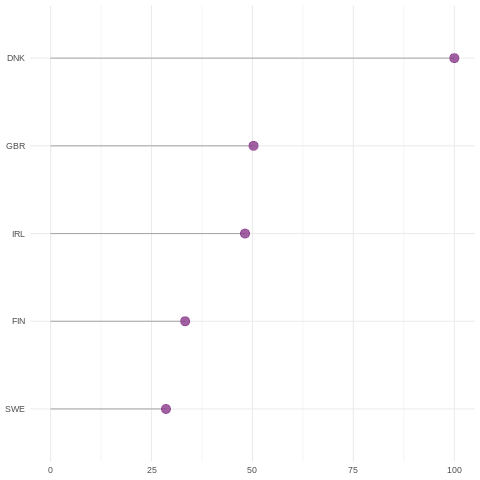

In [29]:
%%R
northern

But this way it's not easy to compare them and wouldn't it be great to have them all in *one* plot? This is where [`patchwork`](https://patchwork.data-imaginist.com/index.html) comes in. Patchwork is a fantastic packages that allows you to add single plots in a very convenient way. Here's one example:

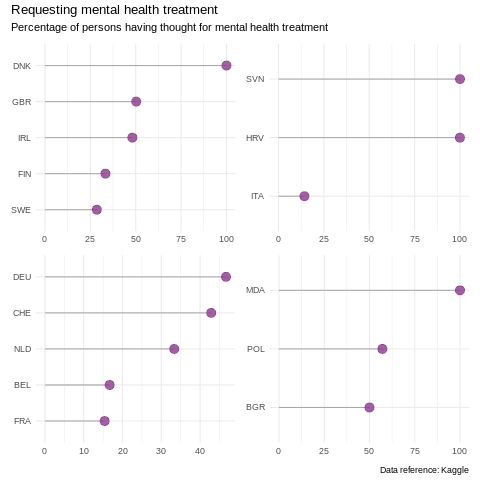

In [30]:
%%R

# We combine the plots
(northern + southern) / (western + eastern) +
# And add an annotation
plot_annotation(title = 'Requesting mental health treatment',
                subtitle = 'Percentage of persons having thought for mental health treatment',
                caption = 'Data reference: Kaggle')

While the plot may be good looking, the function is more important 🤓 What did we learn about the data from the data wrangling process until plotting the visualization? 

Let us summarize what we know:

- We only included European countries
- The sample size is limited (and skewed). Some countries have definitely more information than others.
- We further filtered only for "Yes" (this means we naturally introduce a bias in our visualization). An alternative may be to also include the "No"s - but this still doesn't solve the "small and skewed sample" dilemma. 

And here the "data science circle" starts - we are now asked to think about possible solutions, make different decisions based on our newly gained knowledge and to (possibly) re-iterate the steps made above. Data science processes are often not linear - but that's what we already discussed in the beginning ✨

![](https://github.com/cosimameyer/r-python-talk/blob/main/img/linear_and_circular_2.png?raw=true)


#### Python 🐍

Python also offers visualization libraries. The most famous libraries are [`matplotlib`](https://matplotlib.org) and [`seaborn`](https://seaborn.pydata.org/index.html) (which builds upon the backbone of `matplotlib`). If you are looking for a `ggplot2` equivalent, [`plotnine`](https://plotnine.readthedocs.io/en/stable/) could become your new best friend!

In [31]:
# Similar to R, we add the region
df_python_cleaned['region'] = countrycode.countrycode(codes=df_python_cleaned['country'], 
                                                      origin='iso3c', 
                                                      target='region')

# Keep only those where the answer is "Yes"
df_python_reduced = df_python_cleaned[df_python_cleaned['treatment'] == "Yes"] \
                    [['country', 'percent', 'region']]

# Print the head of the data
df_python_reduced.head()

,country,percent,region
2,BEL,16.67,Western Europe
4,BGR,50.00,Eastern Europe
7,CHE,42.86,Western Europe
10,DEU,46.67,Western Europe
11,DNK,100.00,Northern Europe


In a next step, we finally create the plots:

In [32]:
# And now the plotting magic begins 🔮
plot = {}

for region in region_value:
    # Subset data to the required region only
    df = df_python_reduced[df_python_reduced['region'] == region]
    # Plot the data and store the plot into a dictionary
    plot[region] = (ggplot(df, aes(x='country',y='percent'))+
    geom_segment(mapping=aes(x='reorder(country,percent)',xend='country', y=0, yend='percent'), 
                  color="#a7a9ac")+
    geom_point(color="#88398a", size=4, alpha=0.8)+
    # Flip the coordinates
    coord_flip()+
    # And twist the theme a bit
    theme_minimal()+
    labs(y="", x="")
    )

And here also [`patchworklib`](https://github.com/ponnhide/patchworklib) (a wrapper for `patchwork` that we used in R) helps a lot.

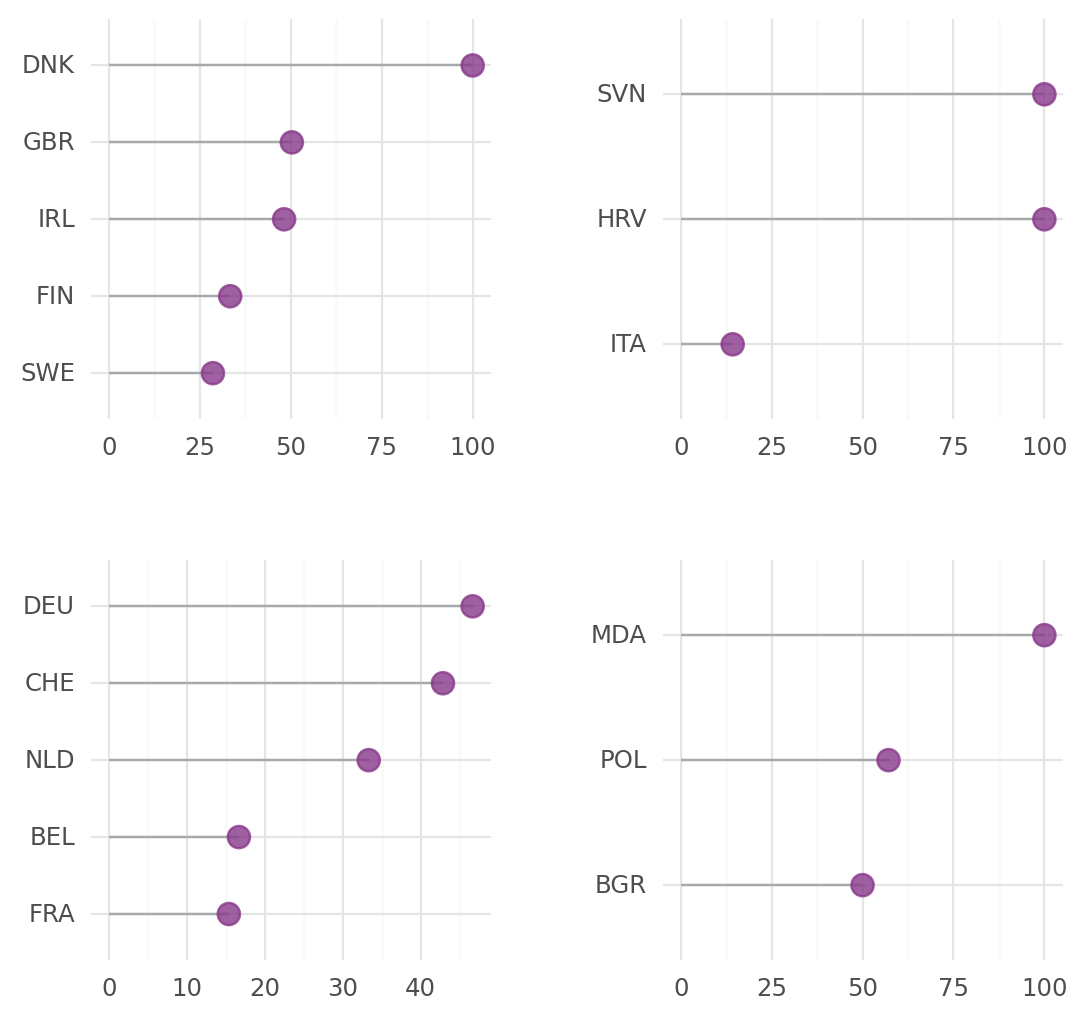

In [33]:
g1 = pw.load_ggplot(plot['Northern Europe'], figsize=(2,2))
g2 = pw.load_ggplot(plot['Southern Europe'], figsize=(2,2))
g3 = pw.load_ggplot(plot['Western Europe'], figsize=(2,2))
g4 = pw.load_ggplot(plot['Eastern Europe'], figsize=(2,2))

(g1 | g2) / (g3 | g4) 

Unlike the features provided by the original `patchwork` packages in R, here we cannot easily add (and define) the title, subtitles as well as captions. But that's often the case if we use a wrapper. 

### More Resources

- R-Ladies 💜 PyLadies series:
    - [Kickoff (including input talks on working in bilingual teams and using Mlflow for MLOps)](https://github.com/rladiescologne/r-and-python-bridging-communities)
    - [Tanya Shapiro: Visualization with `plotnine`](https://github.com/rladiescologne/plotnine)
    - [Angelica Becerra: Automating Workflows Using GitHub Actions and Quarto](https://github.com/angelicambg/GHA_r_py_q)
    - [Erin LeDell: autoML with H2O](https://www.youtube.com/watch?v=Qd6Re5_I-Ps)
- Other helpful sources:
  - [Pandas Tutor](https://pandastutor.com)
  - [Tidy Data Tutor](https://tidydatatutor.com)
  - [`dovpanda`](https://github.com/dovpanda-dev/dovpanda) - directions overlays in pandas
  - [`siuba`](https://github.com/machow/siuba) - tidy-like data wrangling in Python
